In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier

In [2]:
#loading data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
y_train = y_train['Expected']
y_test = pd.read_csv('y_test_pred_dectree_md2.csv')
X_test = pd.read_csv('X_test.csv')
y_test = y_test['Predicted']
df = X_train

In [3]:
def prep_func(df):
    df_noId = df.drop(['Id'], axis=1)
    sparse_attributes = ['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
    histo_features = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    histo_dic = {'histo_ag':['ag_000','ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'], 'histo_ay':['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'], 'histo_az':['az_000','az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'],'histo_ba':['ba_000','ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'],'histo_cn':['cn_000','cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'],'histo_cs' :['cs_000','cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'],'histo_ee': ['ee_000','ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']}
    
    df_lessAtt = df_noId.drop(sparse_attributes, axis=1)
    new_atts_ordinal=[]
    
    for i in histo_dic:  
        #att1=df[histo_dic[i]].max(axis=1)
        att2=df[histo_dic[i]].idxmax(axis="columns")

        #name1 = i + '_val'
        name2 = i + '_mode'
        #se1 = pd.Series(att1)
        se2 = pd.Series(att2)
        #df_lessAtt[name1] = se1.values
        df_lessAtt[name2] = se2.values
        new_atts_ordinal.append(name2)
    
    df_lessAtt[new_atts_ordinal] = df_lessAtt[new_atts_ordinal].fillna('000')
    
    for i in new_atts_ordinal:
        ss=[]
        for j in range(len(df_lessAtt)):
            s=df_lessAtt[i].loc[j][-1]
            ss.append(s)
        df_lessAtt[i]=ss
    
    #df_noHisto = df_lessAtt.drop(histo_features, axis=1)
    
    df_imp1=df_lessAtt.fillna(df_lessAtt.iloc[:,0:92].mean())
    df_imp2 = df_imp1.fillna(0)
    df_f = df_imp2
    return df_f

In [4]:
X_train_p = prep_func(X_train)

In [5]:
X_test_p = prep_func(X_test)

In [6]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_train_p, y_train, test_size=0.33, random_state=42)

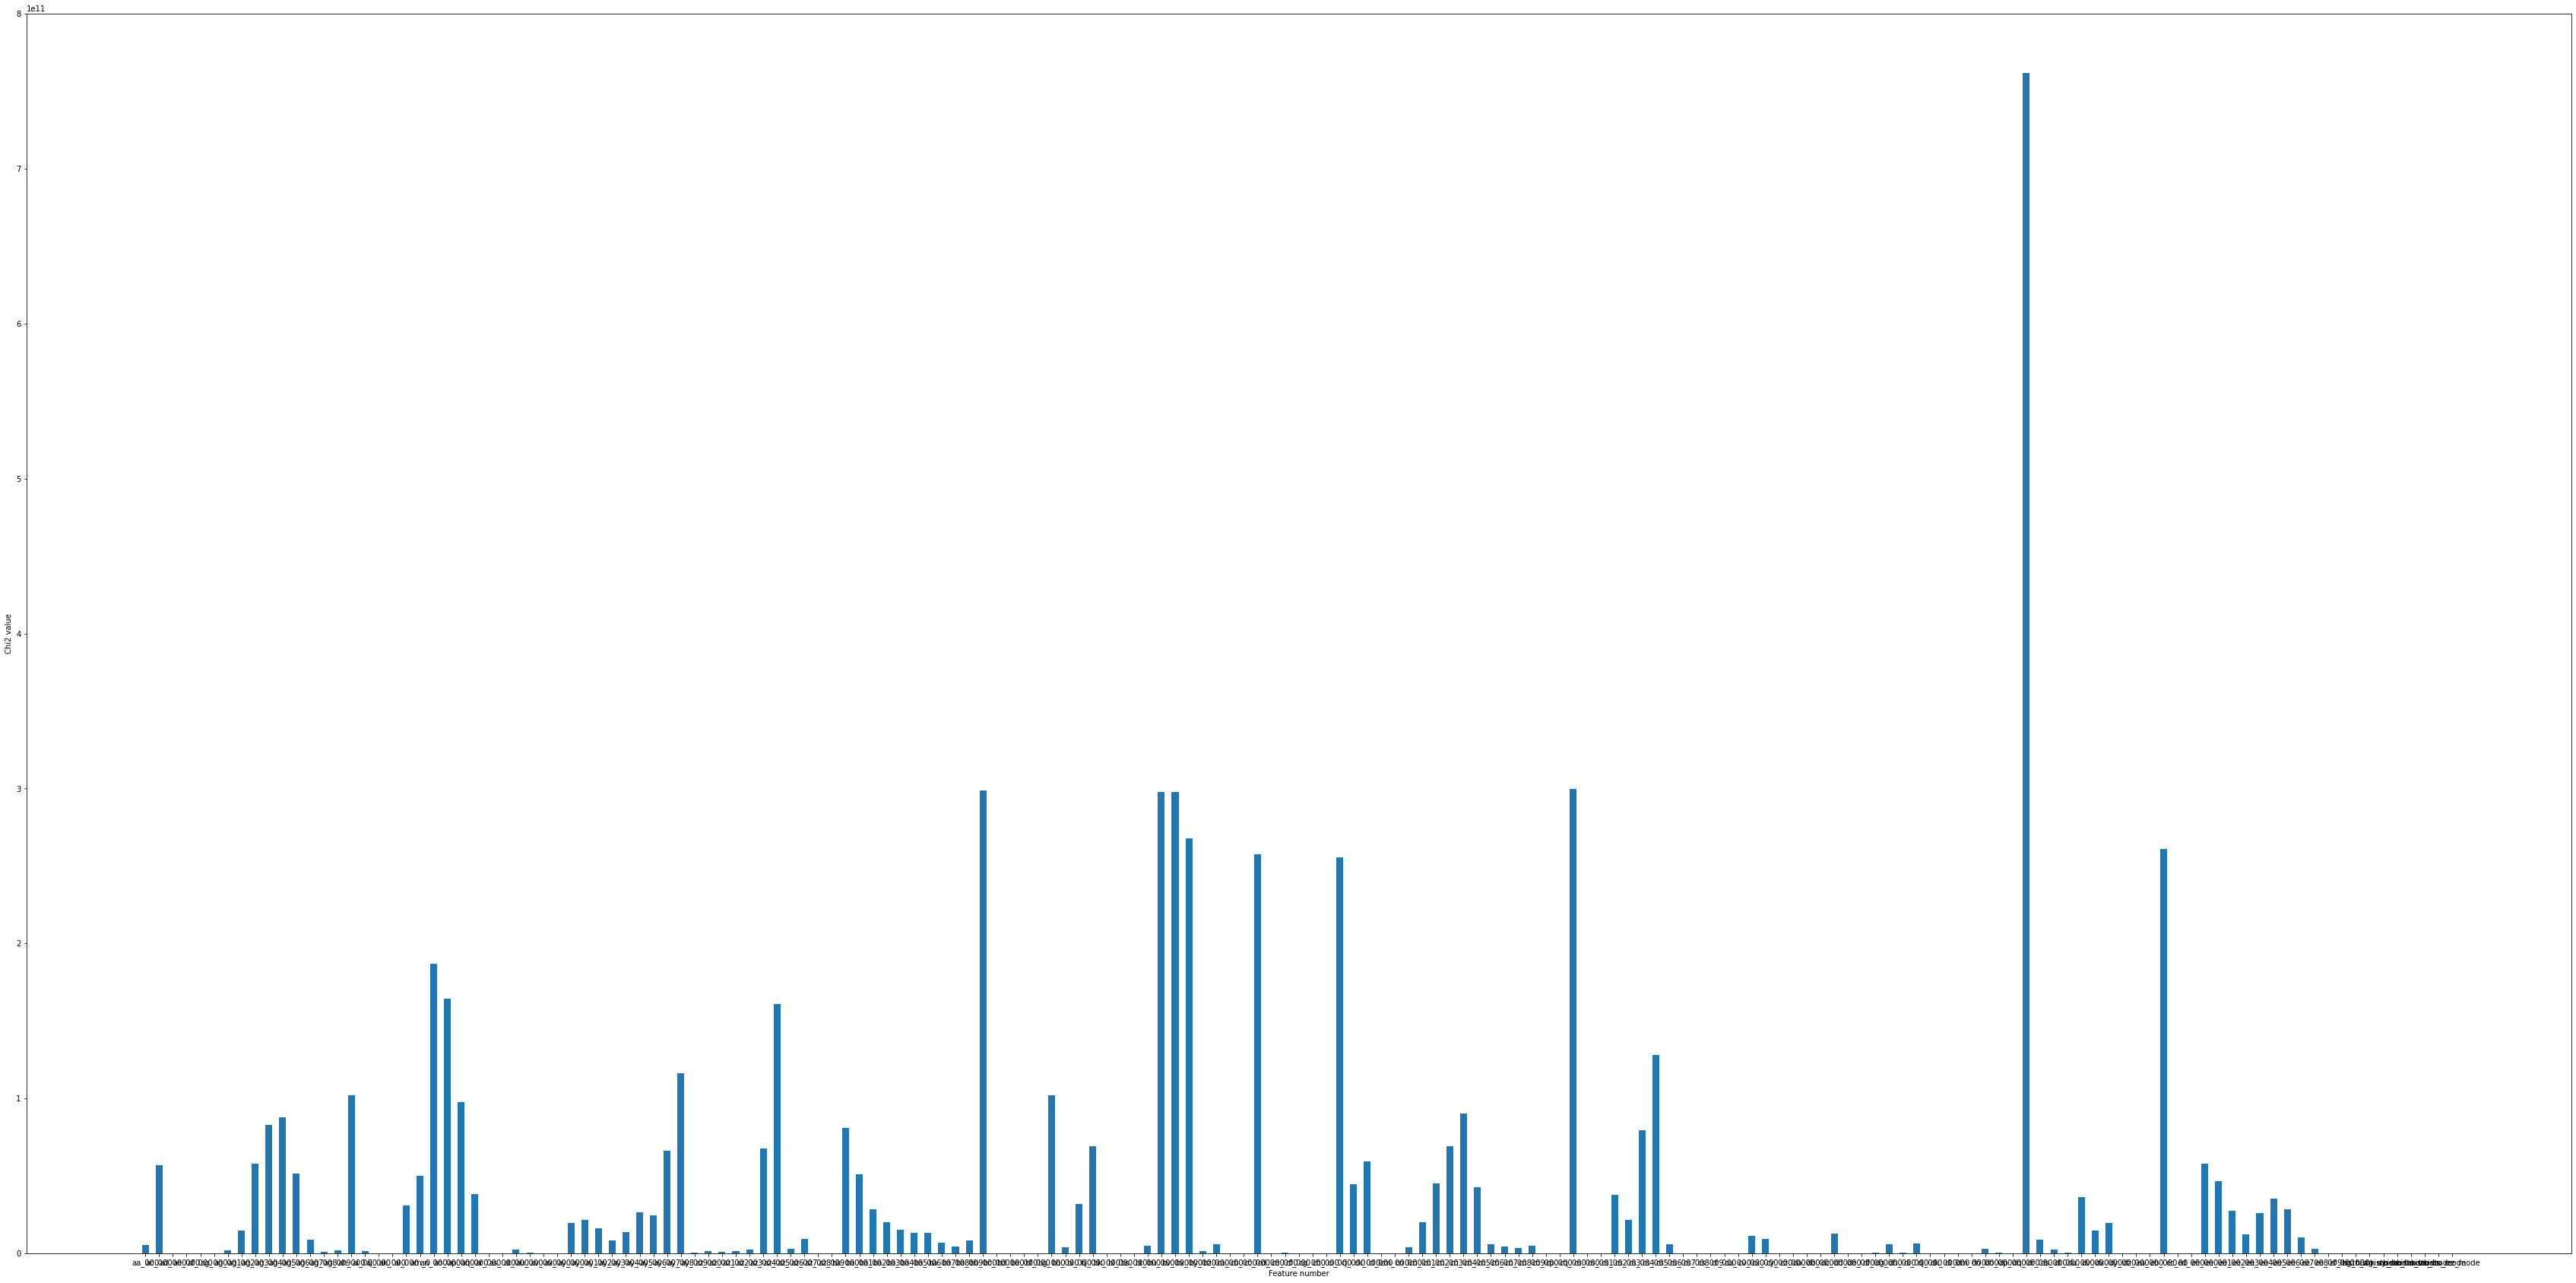

In [8]:
#Feature Selection Chi2 grading of the features
from sklearn.feature_selection import SelectKBest, f_classif, chi2
scores = chi2(X_train_p, y_train)[0]
fig= plt.figure(figsize=(60,30))
plt.clf()
plt.bar(X_trainS.columns, scores, width=0.5)
plt.xlabel("Feature number")
plt.ylabel("Chi2 value")
plt.show()

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


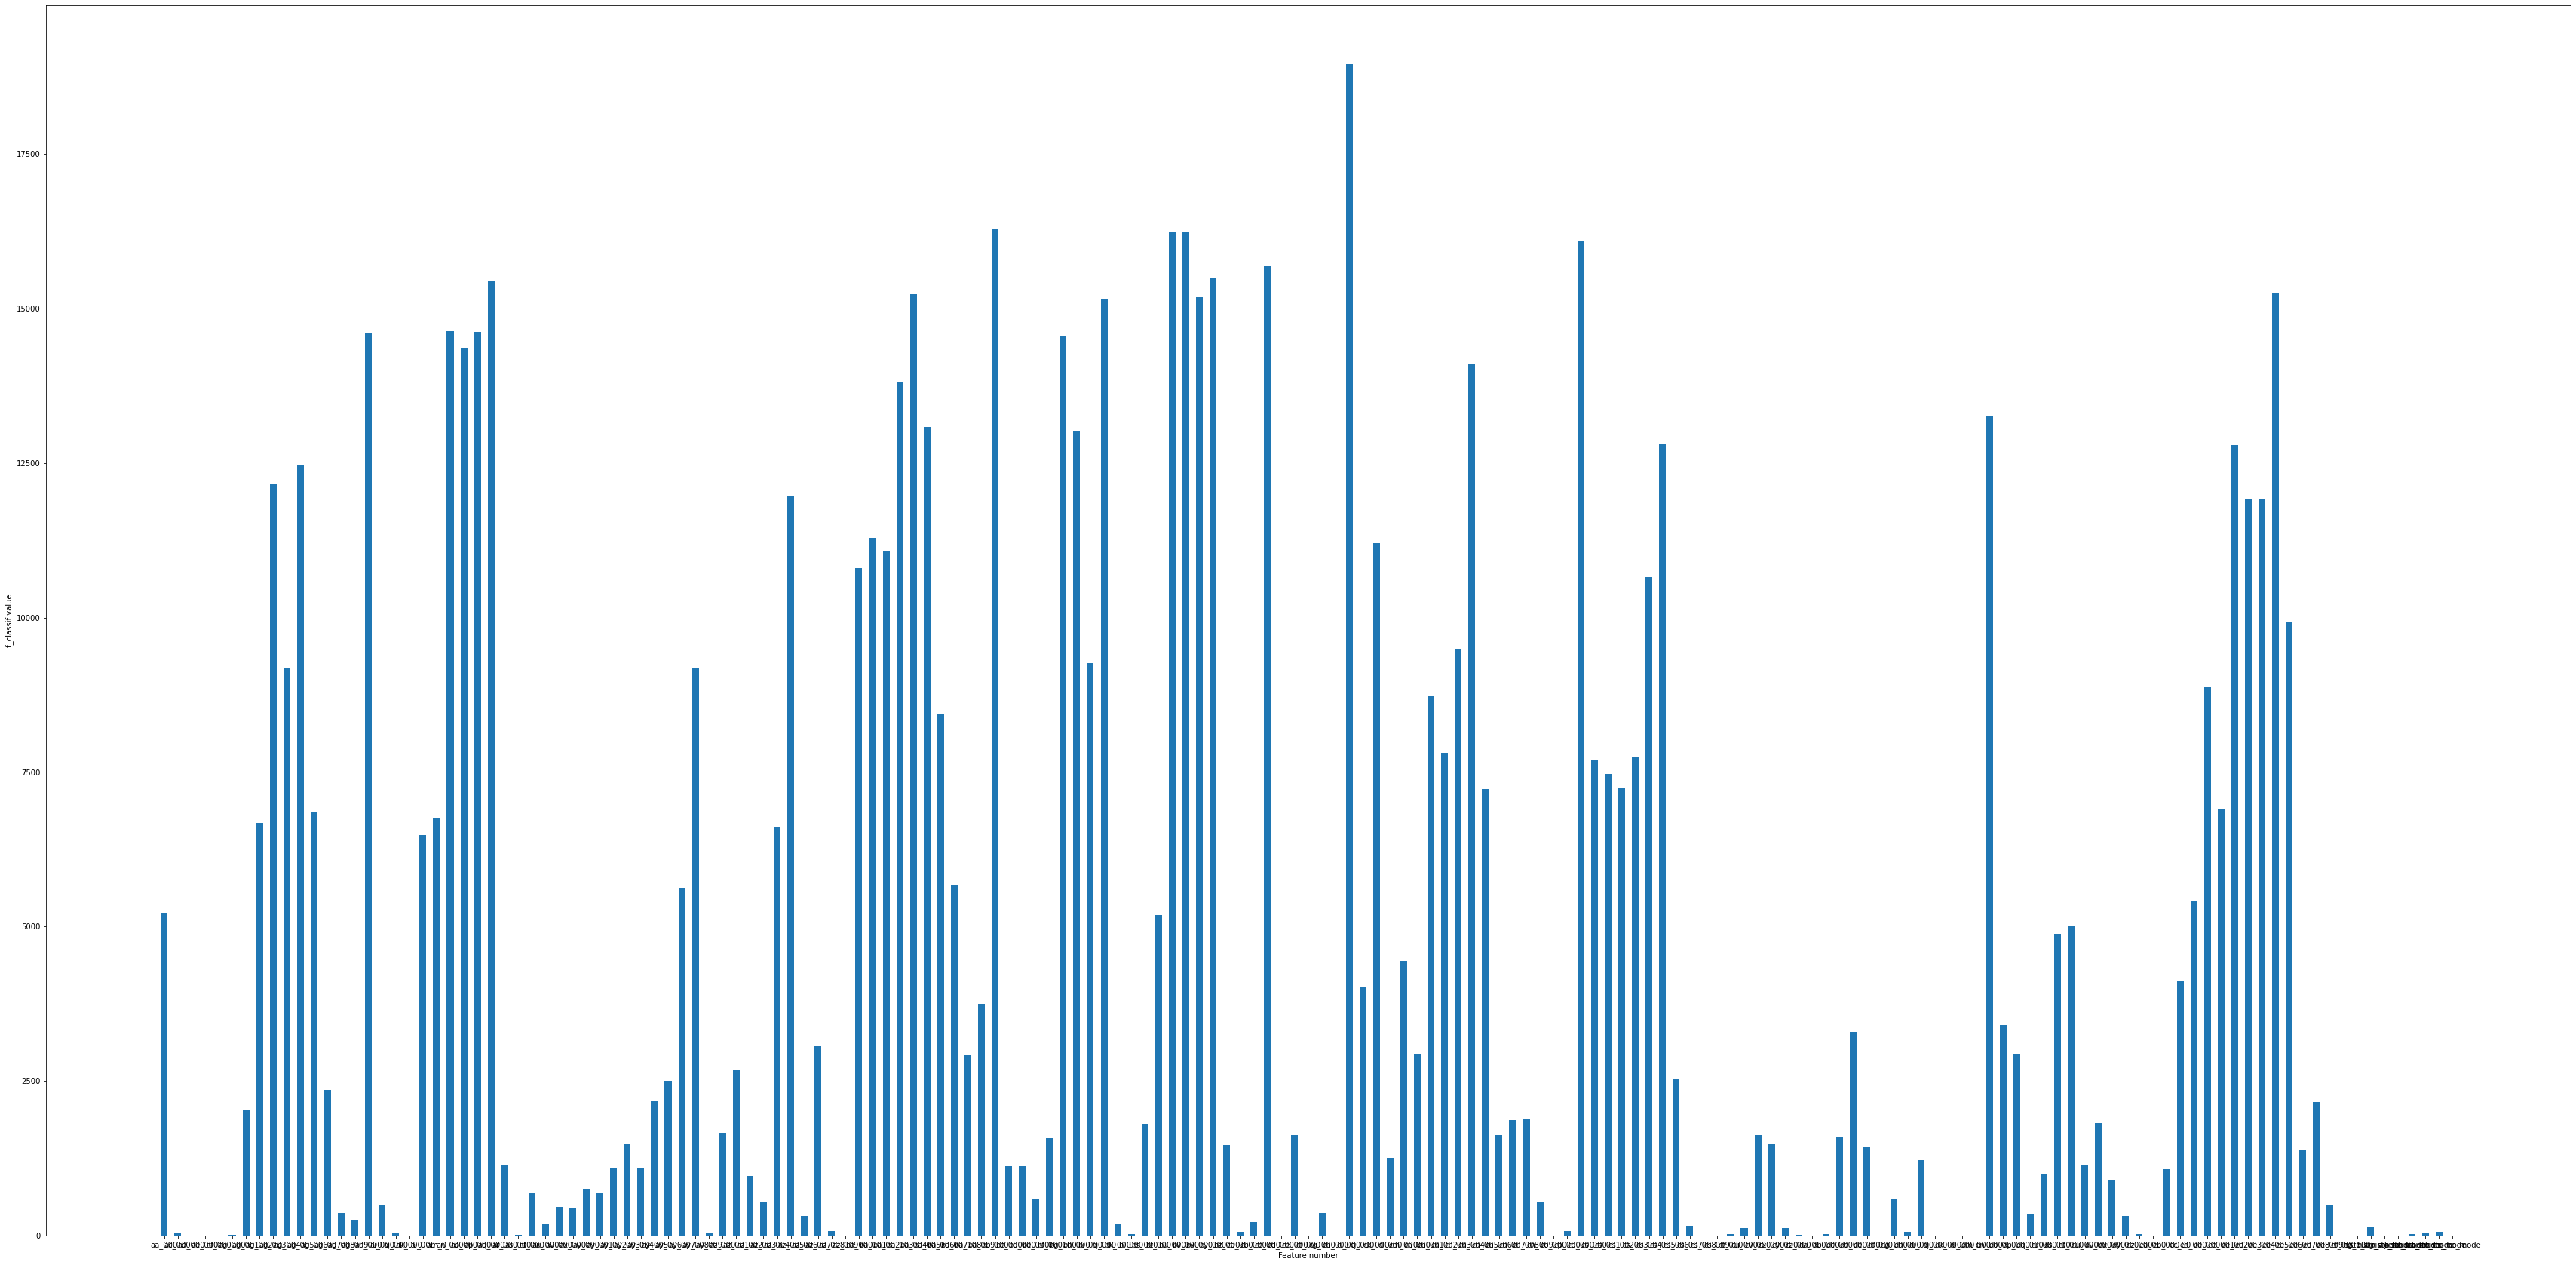

In [9]:
#Feature Selection F_classif grading of the features
scores = f_classif(X_train_p, y_train)[0]
#X_indices = np.arange(X.shape[-1])
fig= plt.figure(figsize=(60,30))
#plt.figure(1)
plt.clf()
plt.bar(X_trainS.columns, scores, width=0.5)
plt.xlabel("Feature number")
plt.ylabel("f_classif value")
plt.show()

0.7465825446898001
0.7809187279151942
0.8066258552394672
0.8104196816208394
0.8083724287260918
0.8084486525855791
0.8214676889375685
0.8221171335030921
0.8218181818181818
0.8284457478005864
0.8290535583272194
0.8302583025830257
0.8275101140125045
0.8192505510653932
0.8204562178072112
0.8232267548695333


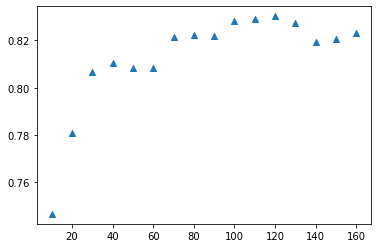

In [11]:
# linSVC, chi2; tuning the number of features
k_val = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
scores = []
for i in k_val:
    clf = linSVC(C=0.0001, class_weight = {1:55})
    pipe = make_pipeline(SelectKBest(chi2, k=i), StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
       
plt.scatter(k_val,scores, marker='^')
plt.show()

In [12]:
# linSVC tuned chi2
clf = linSVC(C=0.0001, class_weight = {1:55})
pipe = make_pipeline(SelectKBest(chi2, k=120), StandardScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
#cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8302583025830257


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.7695010541110331


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.7730321214260502


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8061626657112145


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8153735632183907


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8155128669807902


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8015959376133479


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8110065170166546


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8167690639681967


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8184794470716624


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8141657539247901


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8162518301610543


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8202123764188942


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8127988230967267


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8183486238532112


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8226221079691516


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8232267548695333


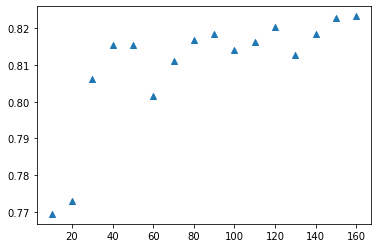

In [13]:
# linSVC, f_classif; tuning the number of features
k_val = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
scores = []
for i in k_val:
    clf = linSVC(C=0.0001, class_weight = {1:55})
    pipe = make_pipeline(SelectKBest(f_classif, k=i), StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
       
plt.scatter(k_val,scores, marker='^')
plt.show()

In [14]:
# tuned linSVC f_classif
clf = linSVC(C=0.0001, class_weight = {1:55})
pipe = make_pipeline(SelectKBest(f_classif, k=120), StandardScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
#cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8202123764188942


0.7576289021396001


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7923593915811814


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7975460122699385


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8187772925764193


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.816849816849817


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8228317272053374


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8268446421950316


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8330248056275452


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8345697329376854


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8380097268986159


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8348863212821469


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8274054661175589


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8186256102140442


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8186256102140442


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8177044261065267


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8155630377852598


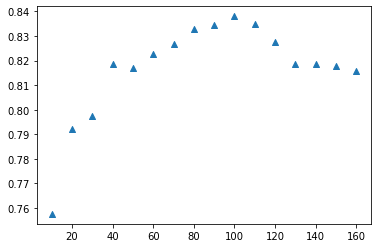

In [16]:
# logreg, chi2; tuning the number of features
k_val = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
scores = []
for i in k_val:
    clf = LogisticRegression(C=0.1, class_weight= {1:55})
    pipe = make_pipeline(SelectKBest(chi2, k=i), StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
       
plt.scatter(k_val,scores, marker='^')
plt.show()

In [18]:
clf = LogisticRegression(C= 0.01, class_weight={1:55})
pipe = make_pipeline(SelectKBest(chi2, k=100), StandardScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
#cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

0.8348863212821469


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, Use

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: Convergenc

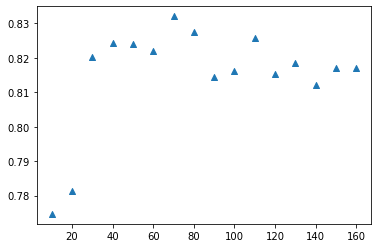

In [18]:
# logreg, f_classif; tuning the number of features
k_val = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
scores = []
for i in k_val:
    clf = LogisticRegression(C=0.1, class_weight= {1:55})
    pipe = make_pipeline(SelectKBest(f_classif, k=i), StandardScaler(), clf)
    y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
    f_score = fbeta_score(y_testS, y_predS, beta = 3)
    mean = np.mean(f_score)
    scores.append(f_score)
    print(f_score)
       
plt.scatter(k_val,scores, marker='^')
plt.show()

In [17]:
#logreg tuned f_classif
clf= LogisticRegression(C= 0.01, class_weight={1:55})
pipe = make_pipeline(SelectKBest(f_classif, k=70), StandardScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
#cv_results = cv(clf, X_train_p, y_train, cv=it, scoring = fthree_scorer)
y_predS = pipe.fit( X_trainS, y_trainS).predict(X_testS)
f_score = fbeta_score(y_testS, y_predS, beta = 3)
print(f_score)

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.8321005917159763


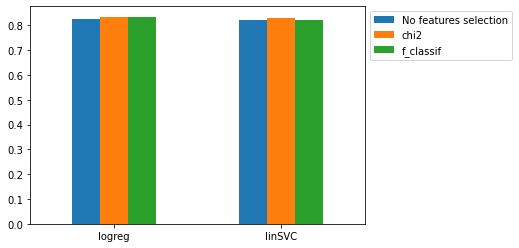

In [20]:
#comparison: tuned algorithms with and without feature selection (chi2 and f_classif)

df = pd.DataFrame({'No features selection': [0.8245481927710843 ,0.8232267548695333],
                   'chi2':[ 0.8348863212821469, 0.8302583025830257],
                  'f_classif':[0.8321005917159763, 0.8202123764188942]}, 
                  index=['logreg', 'linSVC'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1.0, 1.0))